# Example $r^i=M^i{}_jM^j{}_ku^k$

$r^i = M^i{}_jM^j{}_ku^k$, if ADM_ConstringNorm=Msqr

$r^i = M^i{}_ju^j$, otherwise

## Load xAct\`xTras\`, and set some global variables

In [1]:
<< ../xActToC.wl

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
Package xAct`xPert`  version 1.0.6, {2018, 2, 28}
CopyRight (C) 2005-2020, David Brizuela, Jose M. Martin-Garcia and Guillermo\
 
>   A. Mena Marugan, under the General Public License.
** Variable $PrePrint assigned value ScreenDollarIndices
** Variable Prefix changed from Prefix to Postfix
** Option AllowUpperDerivatives of ContractMetric changed from False to True
** Option MetricOn of MakeRule changed from None to All
** Option ContractMetrics of MakeRule changed 

## Set Manifold and Chart

### Dimension=3

In [2]:
(* SetManifoldAndChart[3, cartesian, "[[ijk]]"]; *)
SetManifoldAndChart[3, cartesian, "[[ijk]]", tensorIndexRange -> Union[Complement[IndexRange[a,z],{g}], Table[ToExpression["h"<>ToString[i]],{i,1,9}],
                                                                                                        Table[ToExpression["z"<>ToString[i]],{i,1,9}]]]

### More setup (not needed in most common cases)

In [4]:
DefMetric[1, euclid[-i,-j], CD, PrintAs->"e"];
MetricInBasis[euclid, -cartesian, DiagonalMatrix[{1,1,1}]];
MetricInBasis[euclid, cartesian, DiagonalMatrix[{1,1,1}]];

FoldedRule[{euclid[{2, cartesian}, {1, cartesian}] -> 
 
>     euclid[{1, cartesian}, {2, cartesian}], 
 
>    euclid[{3, cartesian}, {1, cartesian}] -> euclid[{1, cartesian}, {3, cartesian}], 
 
>    euclid[{3, cartesian}, {2, cartesian}] -> euclid[{2, cartesian}, {3, cartesian}]}, 
 
>   {euclid[{1, cartesian}, {1, cartesian}] -> 1, 
 
>    euclid[{1, cartesian}, {2, cartesian}] -> 0, 
 
>    euclid[{1, cartesian}, {3, cartesian}] -> 0, 
 
>    euclid[{2, cartesian}, {2, cartesian}] -> 1, 
 
>    euclid[{2, cartesian}, {3, cartesian}] -> 0, 
 
>    euclid[{3, cartesian}, {3, cartesian}] -> 1}, 
 
>   {euclid[{2, -cartesian}, {1, -cartesian}] -> 
 
>     euclid[{1, -cartesian}, {2, -cartesian}], 
 
>    euclid[{3, -cartesian}, {1, -cartesian}] -> 
 
>     euclid[{1, -cartesian}, {3, -cartesian}], 
 
>    euclid[{3, -cartesian}, {2, -cartesian}] -> 
 
>     euclid[{2, -cartesian}, {3, -cartesian}]}, 
 
>   {euclid[{1, -cartesian}, {1, -cartesian}] -> 1, 
 
>    euclid[{1, -cartesian}, {2, -cartesian}] -> 0, 
 
>    euclid[{1, -cartesian}, {3, -cartesian}] -> 0, 
 
>    euclid[{2, -cartesian}, {2, -cartesian}] -> 1, 
 
>    euclid[{2, -cartesian}, {3, -cartesian}] -> 0, 
 
>    euclid[{3, -cartesian}, {3, -cartesian}] -> 1}]
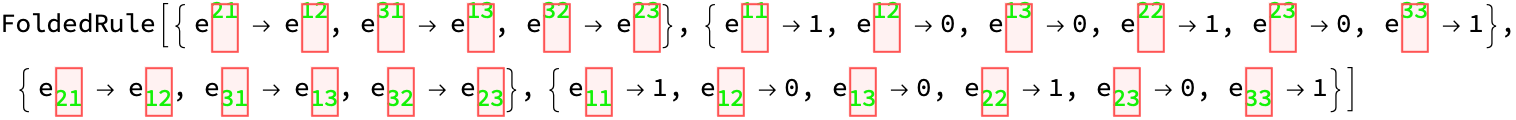

In [6]:
TensorValues[euclid]

euclid[-k, -l]
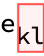

In [7]:
euclid[-k,-l]

## Define Variable List and Equations

### Variable List

In [7]:
dtEvolVarlist = {
   {rU[i]},
   {g[-i,-j],Symmetric[{-i,-j}]}
};
EvolVarlist = {
   {uU[i]},
   {invdetg[]},
   {invg[i,j],Symmetric[{i,j}]}
};
MoreInputVarlist = {
   {MDD[-i,-j],Symmetric[{-i,-j}]}
};
TempVarlist = {
   {vU[i]}
};

{{rU[i]}, {g[-i, -j], Symmetric[{-i, -j}]}}
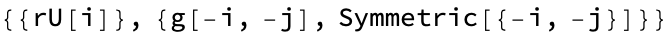

In [18]:
dtEvolVarlist

In [11]:
ManipulateVarlist["set components: independent varlist index", dtEvolVarlist];

In [20]:
<< ../Codes/Nmesh.wl

 Writing to output.c
output.c already exist, replacing it ...

Done generating output.c



In [21]:
SetRHSOfInvMetricAndDet[g,invdetg2,invg2]

                         2
{{invdetg2[] (-g23[[ijk]]  + g22[[ijk]] g33[[ijk]]), 
 
>    invdetg2[] (g13[[ijk]] g23[[ijk]] - g12[[ijk]] g33[[ijk]]), 
 
>    invdetg2[] (-(g13[[ijk]] g22[[ijk]]) + g12[[ijk]] g23[[ijk]])}, 
 
>   {invdetg2[] (g13[[ijk]] g23[[ijk]] - g12[[ijk]] g33[[ijk]]), 
 
                            2
>    invdetg2[] (-g13[[ijk]]  + g11[[ijk]] g33[[ijk]]), 
 
>    invdetg2[] (g12[[ijk]] g13[[ijk]] - g11[[ijk]] g23[[ijk]])}, 
 
>   {invdetg2[] (-(g13[[ijk]] g22[[ijk]]) + g12[[ijk]] g23[[ijk]]), 
 
>    invdetg2[] (g12[[ijk]] g13[[ijk]] - g11[[ijk]] g23[[ijk]]), 
 
                            2
>    invdetg2[] (-g12[[ijk]]  + g11[[ijk]] g22[[ijk]])}}
called


invdetg2$RHS[]
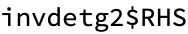

In [23]:
invdetg2$RHS[]

FoldedRule[{g[{2, -cartesian}, {1, -cartesian}] -> g[{1, -cartesian}, {2, -cartesian}], 
 
>    g[{3, -cartesian}, {1, -cartesian}] -> g[{1, -cartesian}, {3, -cartesian}], 
 
>    g[{3, -cartesian}, {2, -cartesian}] -> g[{2, -cartesian}, {3, -cartesian}]}, 
 
>   {g[{1, -cartesian}, {1, -cartesian}] -> g11[[ijk]], 
 
>    g[{1, -cartesian}, {2, -cartesian}] -> g12[[ijk]], 
 
>    g[{1, -cartesian}, {3, -cartesian}] -> g13[[ijk]], 
 
>    g[{2, -cartesian}, {2, -cartesian}] -> g22[[ijk]], 
 
>    g[{2, -cartesian}, {3, -cartesian}] -> g23[[ijk]], 
 
>    g[{3, -cartesian}, {3, -cartesian}] -> g33[[ijk]]}]
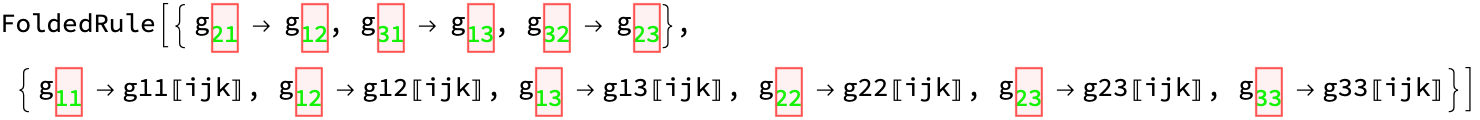

In [16]:
TensorValues[g]

TensorValues::invalid: invg2$RHS is not a valid expression for TensorValues.

Throw::nocatch: Uncaught Throw[Null] returned to top level.

Hold[Throw[Null]]
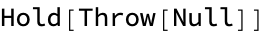

In [24]:
TensorValues[invg2$RHS]

FoldedRule[{}, {invdetg2$RHS[] -> 
 
                       2
>     -(1 / (g13[[ijk]]  g22[[ijk]] - 2 g12[[ijk]] g13[[ijk]] g23[[ijk]] + 
 
                     2                                    2
>          g12[[ijk]]  g33[[ijk]] + g11[[ijk]] (g23[[ijk]]  - g22[[ijk]] g33[[ijk]])))}]
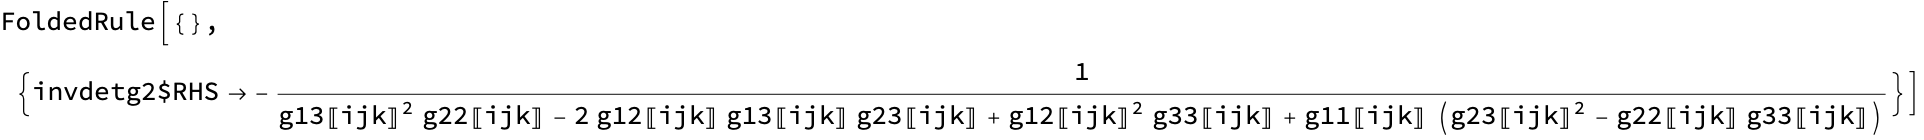

In [26]:
TensorValues[invdetg2$RHS]

In [30]:
DefTensor[RHSOf[invg][i,j],$Manifd, Symmetric[{i,j}]]

FoldedRule[{}, {}]
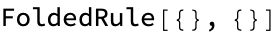

In [31]:
TensorValues[RHSOf[invg]]